### Median Filtering (Feb 10, 2022)
Today, my coding challenge is related to my current research project on inversions of the Sun - the context doesn't matter too much, though, my goal here is to create a routine to median filter data with nearby pixels, for a "smooting" effect. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits

In [2]:
# importing some data to look at & test: 
atmos = fits.open('/Volumes/EDRIVE/Fall_2021/Research/SIR/SIR_results/2008_large/inv_res_mod.fits')[0].data

# and for context later, the inverted spectra:
spectra = fits.open('/Volumes/EDRIVE/Fall_2021/Research/SIR/SIR_results/2008_large/inv_res_prof.fits')[0].data

obs = fits.open('/Volumes/EDRIVE/Fall_2021/Research/SIR/SIR_results/2008_large/observed_prof.fits')[0].data

Text(0.5, 1.0, 'inverted continuum spectra')

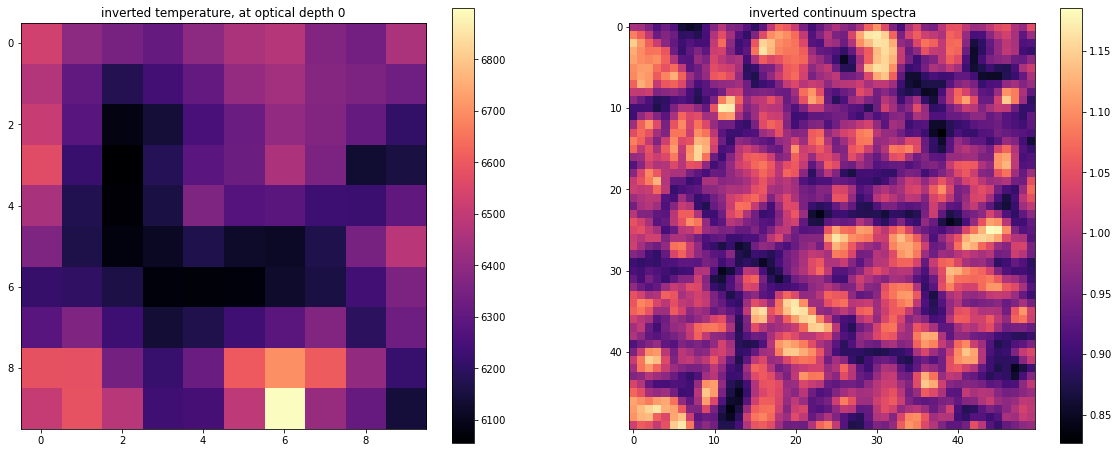

In [71]:
# taking a look at the map in question: inverted temperature at a fixed depth, and comparing it to the inverted spectra intensity
max = 50

plt.figure(figsize = [20, 8])

plt.subplot(1,2,1)
plt.imshow(atmos[1, 10, 0:10, 40:50], cmap = 'magma'); plt.colorbar()
plt.title('inverted temperature, at optical depth 0')

plt.subplot(1,2,2)
plt.imshow(spectra[0, 10, :max, :max], cmap = 'magma'); plt.colorbar()
plt.title('inverted continuum spectra')

(4, 60, 200, 200) (4, 60, 200, 200)


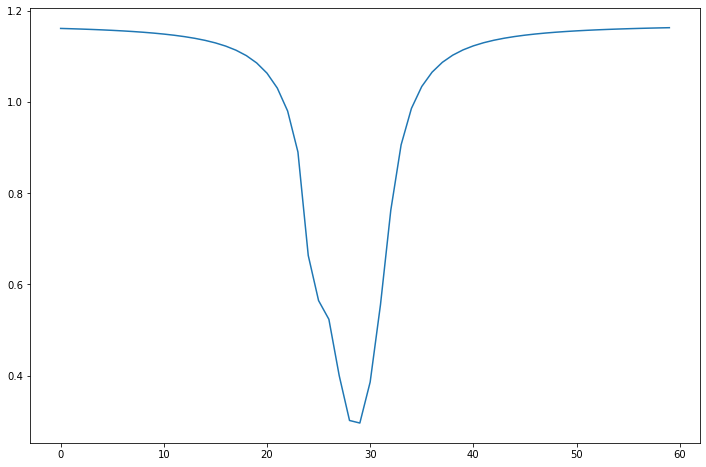

In [85]:
print(obs.shape, spectra.shape)
plt.figure(figsize = [12,8])
#plt.plot(obs[0, :, 9, 46])
plt.plot(spectra[0, :, 9, 46])



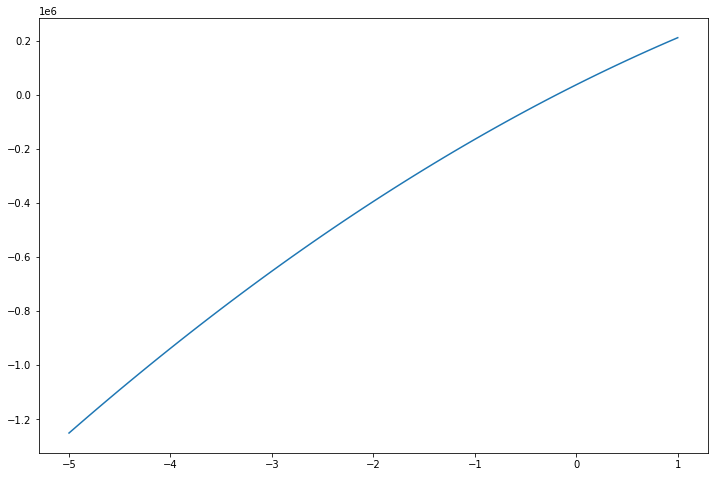

In [83]:
plt.figure(figsize = [12,8])
plt.plot(atmos[0, :, 9, 46], atmos[5, :, 9, 46])

Overall, both look good and resemble each other! However, it's clear that the temperature map is much more noisy - i.e. not as 'clean' and continuous as the spectra map. 

This is where the goal of this routine comes from: I want to median filter discontinuous pixels in the temperature map, over all depth points. 

This leads to two goals:
1. Identify which temperature points are discontinous
2. Median filter only these, and create a script to do this efficiently over all depth points. 

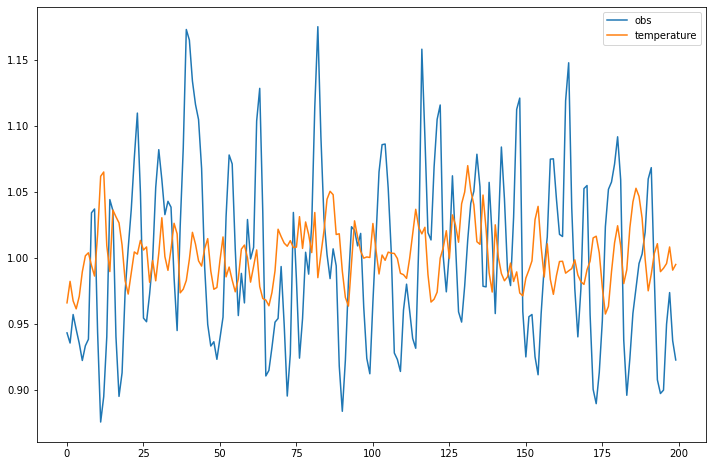

In [11]:
# looking at difference between 'smooth' observation and 'noisy' temperature

i = 30
plt.figure(figsize = [12,8])
plt.plot(spectra[0, 10, i, :]/np.mean(spectra[0, 10, i, :]), label = 'obs')
plt.plot(atmos[1, 10, 10, :]/np.mean(atmos[1, 10, i, :]), label = 'temperature')
plt.legend()

In [3]:
#edges will be hard... for now, lose 1 row around edges and median filter 'middle'

max = 50
testdata = np.copy(atmos[:, :, :max, :max])
mediandata = np.empty((testdata.shape[0], testdata.shape[1], testdata.shape[2] - 2, testdata.shape[3] - 2))

median_radius = 1

for i in range (testdata.shape[2] - 2): # -2 for 2 edge pixels
    for j in range(testdata.shape[3] - 2):
        mediandata[:, :, i, j] = np.median(testdata[:, :, (i - median_radius):(i + median_radius), (j - median_radius):(j + median_radius)], axis = (2, 3))


/Users/james/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/james/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Text(0.5, 1.0, 'inverted continuum spectra')

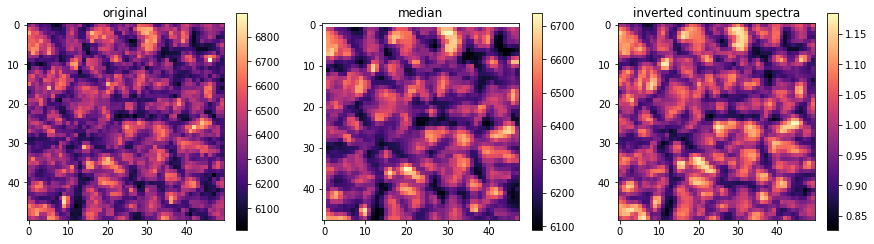

In [4]:
max = 50

plt.figure(figsize = [15, 4])

plt.subplot(1,3,1)
plt.imshow(atmos[1, 10, :max, :max], cmap = 'magma'); plt.colorbar()
plt.title('original')

plt.subplot(1,3,2)
plt.imshow(mediandata[1, 10, :max, :max], cmap = 'magma'); plt.colorbar()
plt.title('median')

plt.subplot(1,3,3)
plt.imshow(spectra[0, 10, :max, :max], cmap = 'magma'); plt.colorbar()
plt.title('inverted continuum spectra')

In [8]:
save_fits = mediandata[:,:,1:,1:]
hdu = fits.PrimaryHDU(save_fits)
hdul = fits.HDUList([hdu])
hdul.writeto('median_atmos.fits')